In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/student-marks-prediction/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [52]:
df.shape

(100, 3)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [55]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

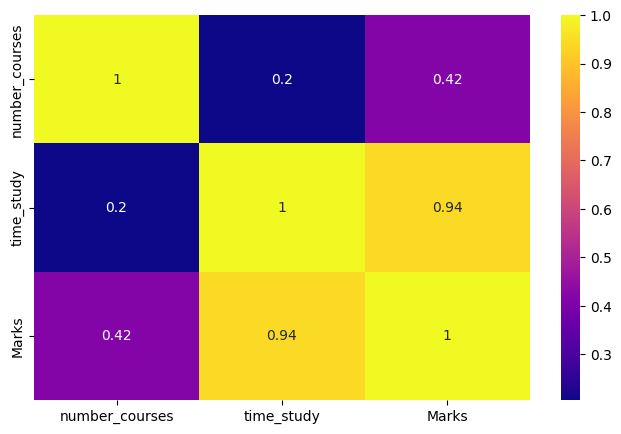

In [61]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [62]:
df = df.drop(['number_courses'],axis=1)
df.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [65]:
df.Marks.value_counts()

Marks
19.202    1
21.379    1
7.014     1
20.398    1
13.416    1
         ..
24.172    1
8.837     1
9.333     1
26.532    1
32.357    1
Name: count, Length: 100, dtype: int64

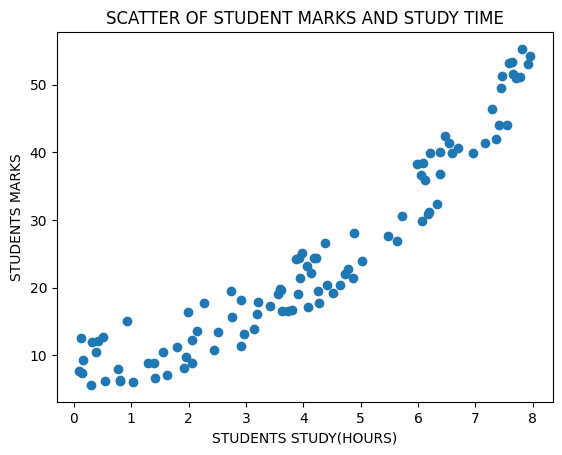

In [67]:
#Now check out a scatter plot for this dataset
plt.scatter(x=df.time_study,y=df.Marks)
plt.xlabel('STUDENTS STUDY(HOURS)')
plt.ylabel('STUDENTS MARKS')
plt.title('SCATTER OF STUDENT MARKS AND STUDY TIME')
plt.show()

SO THE DATASET IS PROPERLY LINEAR

<Axes: xlabel='Marks', ylabel='Density'>

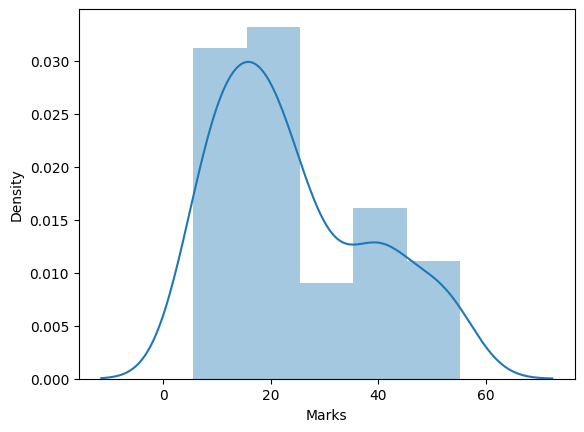

In [68]:
sns.distplot(df.Marks)

<Axes: xlabel='time_study', ylabel='Density'>

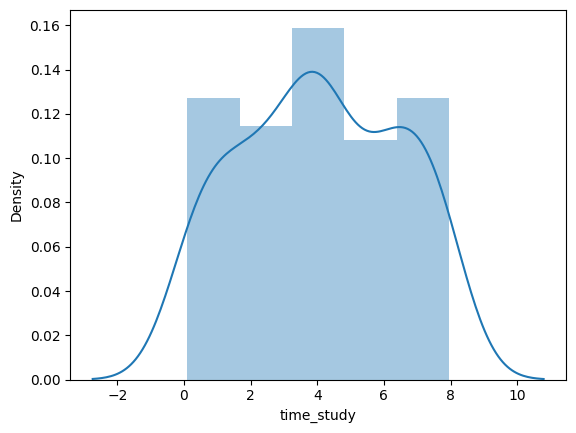

In [70]:
sns.distplot(df.time_study)

In [ ]:
#Now split the dataset
x = df.drop(['Marks'],axis=1)
y = df['Marks']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [77]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.9040228286990539
RIDGE  0.8992194445769155
LASSO  0.8698132323045138
ELASTICNET 0.6843829147368332
RANDOM FOREST  0.9479684559483974
GB 0.9370778047341726
ADABOOST 0.9576533979572983
XGB 0.9400426578917963
KNN 0.9559672493900714
SVR 0.6900589115780169
CAT 0.9434246334219757
LIGHTGBM 0.8684922948381021
GUASSIAN PROCESS 0.9611779378120144


so the best performing model is Guassian process --> GUASSIAN PROCESS 0.9611779378120144